# **Milk Quality Prediction**
Life cycle of Machine Learning Project


*   Understanding the problem statement
*   Data Collection 
*   Exploratory Data Analysis
*   Data Cleaning 
*   Data Pre-Processing
*   Model Training
*   Feature Imoortance Using Random Forest Classifier
*   PCA of Features
*   Artificial Neural Network




















#  **Description of Dataset**:

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.

pH: This feature defines pH of the milk, which is in the range of 3 to 9.5. temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

colour: This feature defines the color of the milk, which is in the range of 240 to 255.

grade: This is the target and takes the values: low_quality, medium_quality, or high_quality.

We have to perform data processing, and data augumentation to build statistical and predictive models to predict the quality of the milk.


# **Importing Libraries**

In [492]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [493]:
df=pd.read_csv('/content/drive/MyDrive/dataset/milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# **EDA**

Show the top 5 records

In [494]:
df.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Show the last 5 records

In [495]:
df.tail(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [496]:
df.keys()

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

Summary of Datset

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


Descriptive summary of Dataset

In [498]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Shape of the Dataset

In [499]:
df.shape

(1059, 8)

Check the columns

In [500]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

Data types 

In [501]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

Checking Missing values

In [502]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

There are no null values so we do not need to handle it.

Unique values

In [503]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

Check the counts of different values

In [504]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

To check duplicate value

In [505]:
df[df.duplicated()]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


Checking the count of duplicate value

In [506]:
df.duplicated().sum()

976

Check each columns unique values

In [507]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('-------------------------------------------------------')

pH
[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]
-------------------------------------------------------
Temprature
[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]
-------------------------------------------------------
Taste
[1 0]
-------------------------------------------------------
Odor
[0 1]
-------------------------------------------------------
Fat 
[1 0]
-------------------------------------------------------
Turbidity
[0 1]
-------------------------------------------------------
Colour
[254 253 246 255 250 247 245 240 248]
-------------------------------------------------------
Grade
['high' 'low' 'medium']
-------------------------------------------------------


Check Each columns value counts

In [508]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('-------------------------------------------------------')

pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64
-------------------------------------------------------
Temprature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64
-------------------------------------------------------
Taste
1    579
0    480
Name: Taste, dtype: int64
-------------------------------------------------------
Odor
0    601
1    458
Name: Odor, dtype: int64
-------------------------------------------------------
Fat 
1    711
0    348
Name: Fat , dtype: int64
-------------------------------------------------------
Turbidity
0    539
1    520
Name: Turbidity, dtype: int64
-------------------------------------------------------
Colour
255    628
250    146
245    115
247   

Check the coorelation

In [509]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


<Axes: >

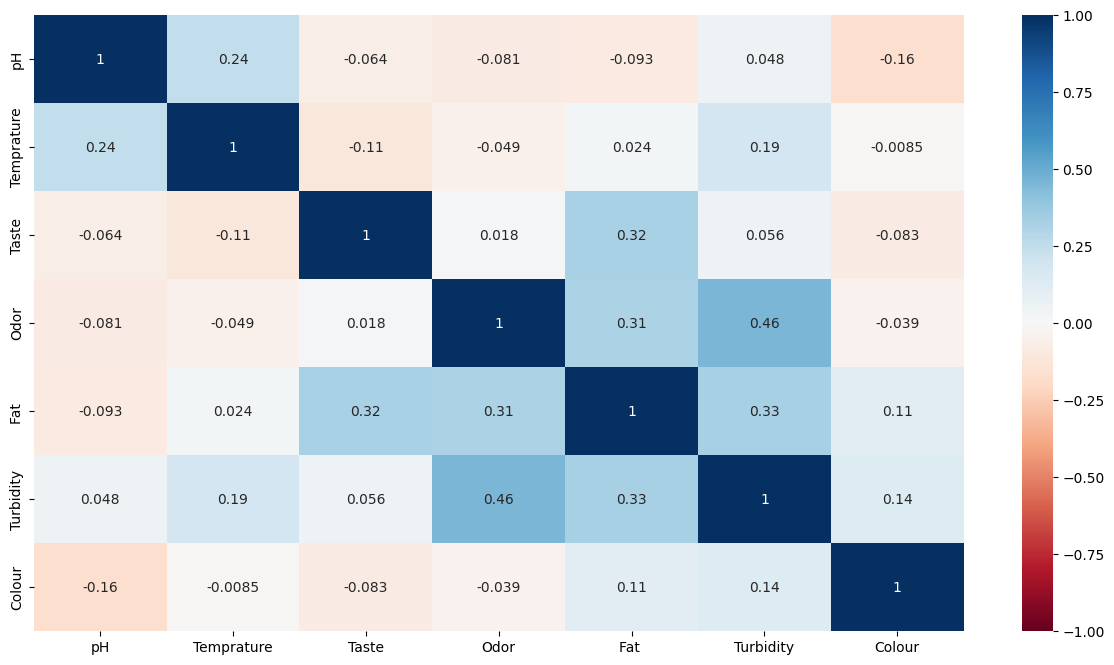

In [510]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1 , annot=True)

<Axes: >

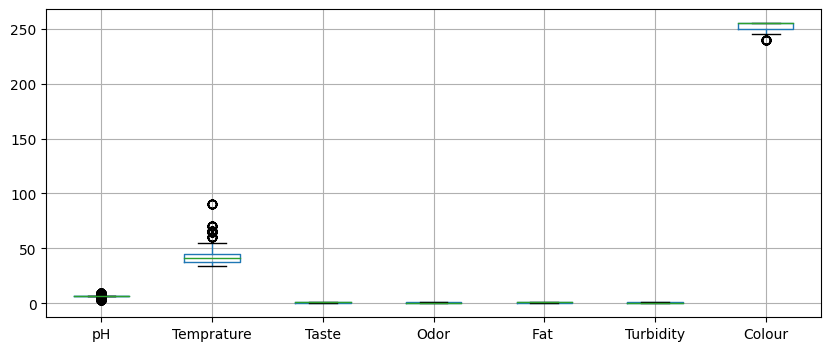

In [511]:
plt.figure(figsize=(10,4))
df.boxplot()

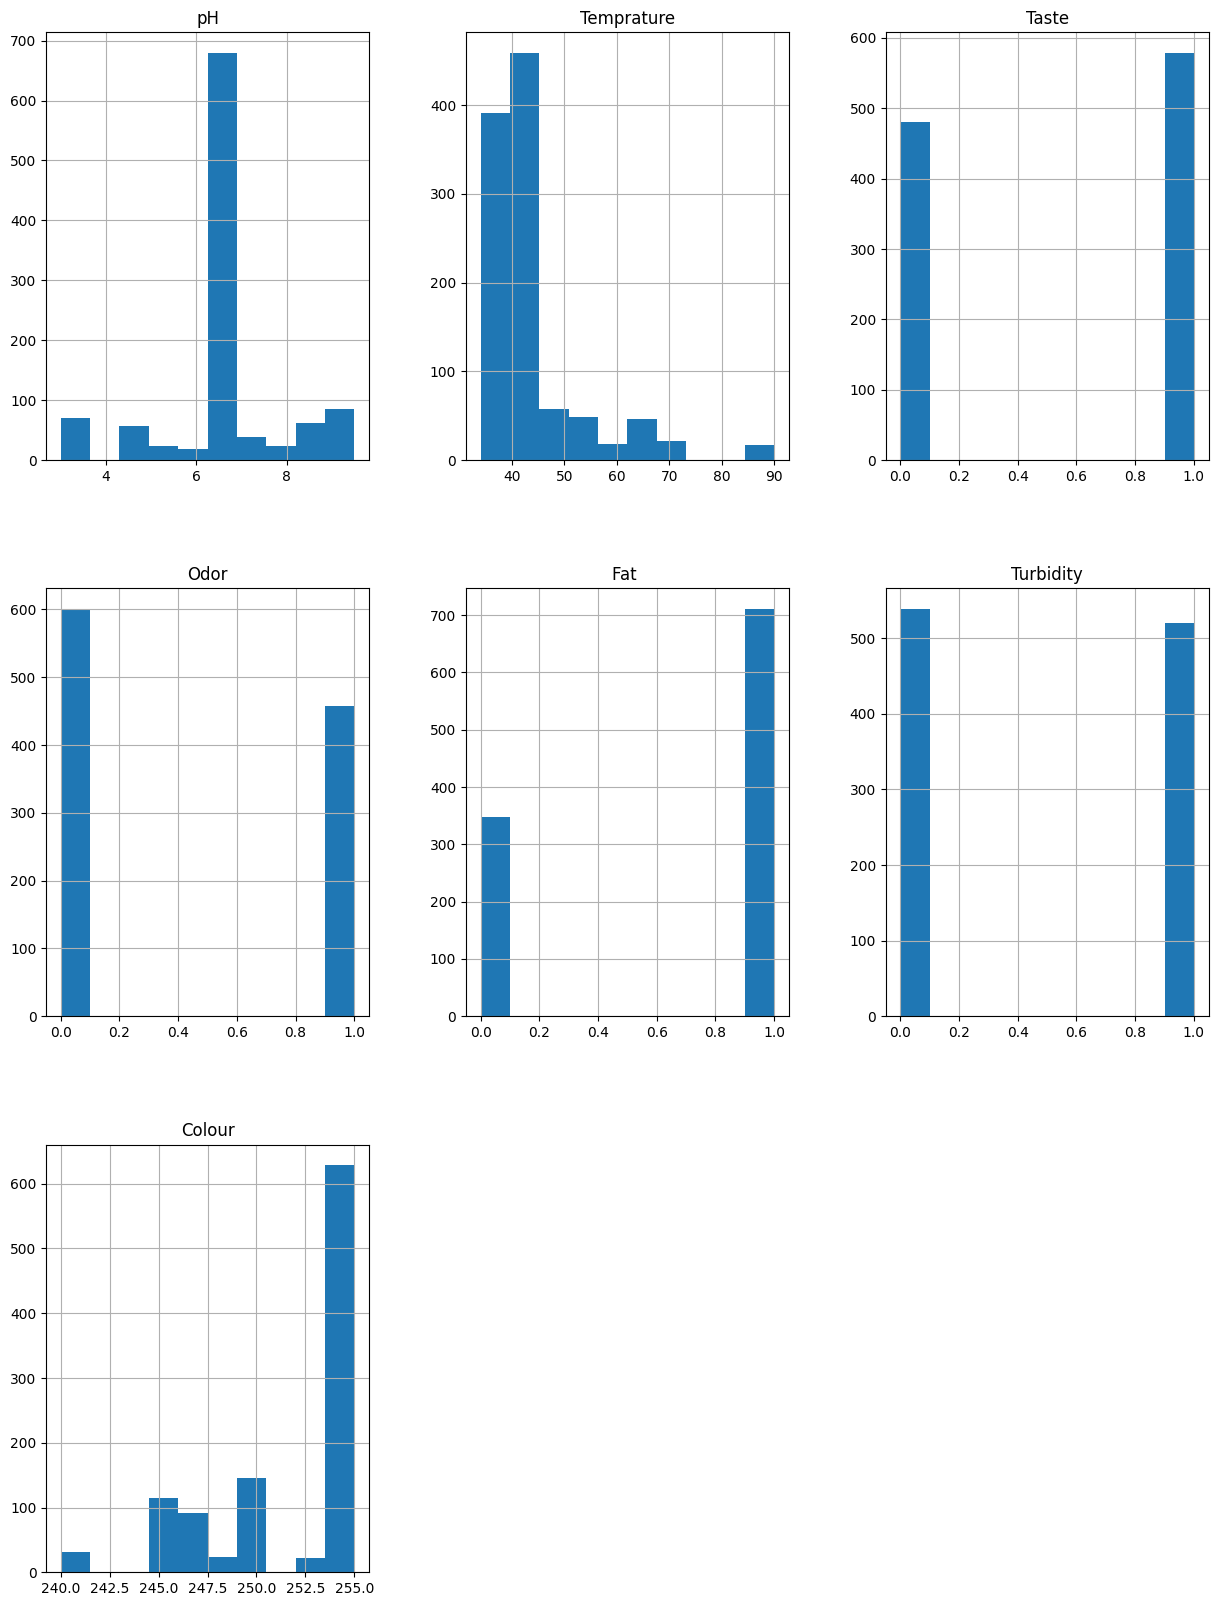

In [512]:
df.hist(figsize=(15,20));

Count plot

Text(0.5, 1.0, 'Count plot for Milk variants.')

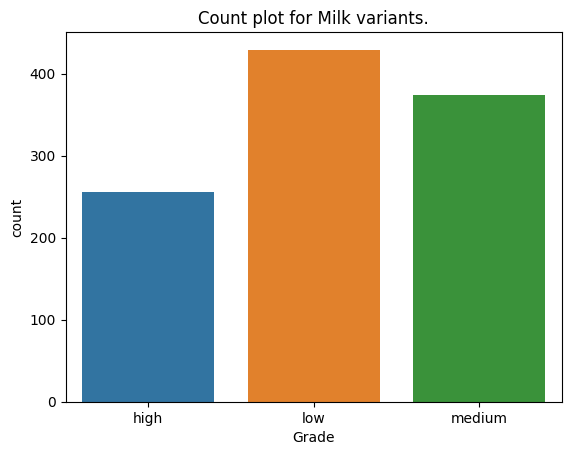

In [513]:
sns.countplot(x='Grade', data=df).set_title('Count plot for Milk variants.')

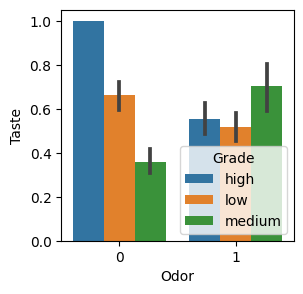

In [514]:
plt.figure(figsize=(3,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=df)
plt.show()

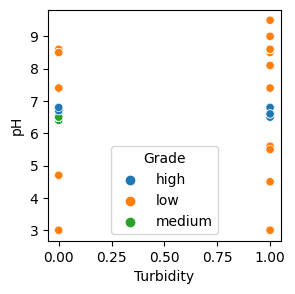

In [515]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=df)
plt.show()

<Axes: ylabel='Taste'>

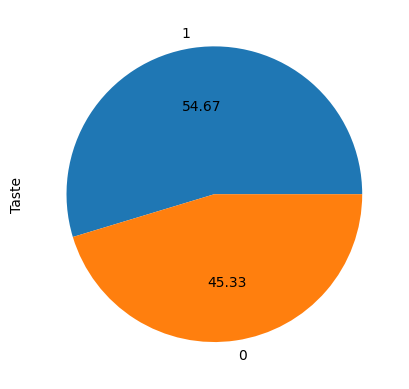

In [516]:
df['Taste'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='pH', ylabel='Count'>

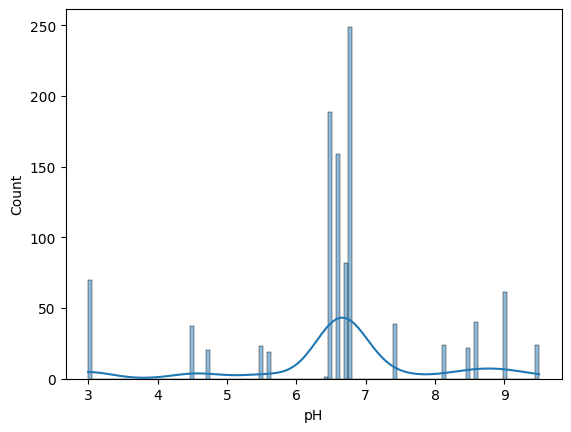

In [517]:
sns.histplot(df['pH'],kde=True)

# Feature Engineering

Convert categorical feature to numerical feature of Grade

In [518]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#transform Grade in numerical numbers using label encoder
df['Grade']= label_encoder.fit_transform(df['Grade'])
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


# Building a Machine Learning Model

In [519]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [520]:
 #spliting into train and test
x= df.drop(['Grade'],axis=1)
y= df['Grade']

In [521]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [522]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (741, 7)
X Test :  (318, 7)
Y Train :  (741,)
Y Test :  (318,)


In [523]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict

array([2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1,

              precision    recall  f1-score   support

           0       0.76      0.48      0.59        71
           1       0.81      0.76      0.78       142
           2       0.68      0.90      0.77       105

    accuracy                           0.74       318
   macro avg       0.75      0.71      0.71       318
weighted avg       0.75      0.74      0.73       318



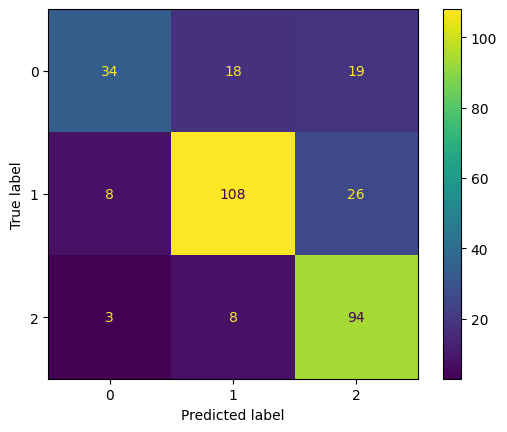

In [524]:
lr_acc_score = accuracy_score(y_test, lr_predict)
print(classification_report(y_test,lr_predict))
print(ConfusionMatrixDisplay.from_predictions(y_test,lr_predict))

In [525]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=0,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_predicted

array([2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1,

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       105

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



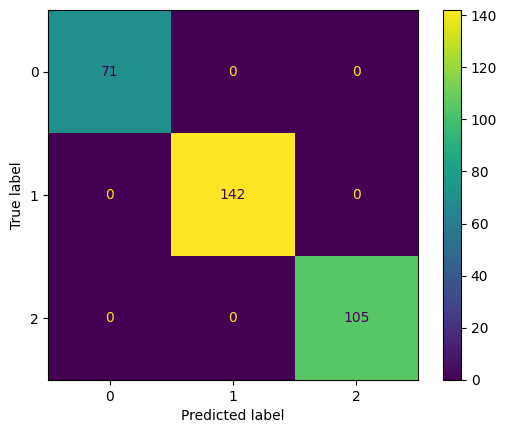

In [526]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(classification_report(y_test,rf_predicted))
print(ConfusionMatrixDisplay.from_predictions(y_test,rf_predicted))

In [527]:
m3 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_predicted

array([2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1,

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       1.00      0.96      0.98       142
           2       0.93      0.97      0.95       105

    accuracy                           0.97       318
   macro avg       0.96      0.96      0.96       318
weighted avg       0.97      0.97      0.97       318



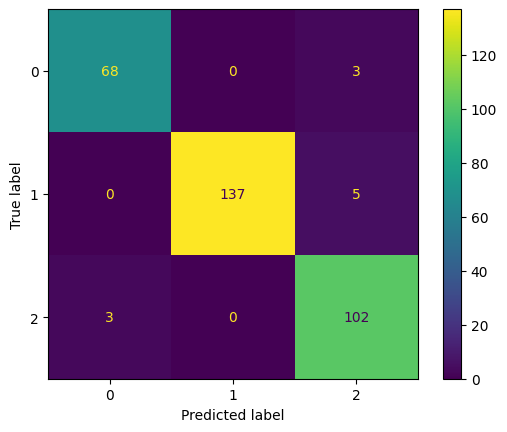

In [528]:
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(classification_report(y_test,knn_predicted))
print(ConfusionMatrixDisplay.from_predictions(y_test,knn_predicted))

In [529]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_predicted

array([2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1,

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        71
           1       1.00      1.00      1.00       142
           2       1.00      0.76      0.86       105

    accuracy                           0.92       318
   macro avg       0.91      0.92      0.91       318
weighted avg       0.94      0.92      0.92       318



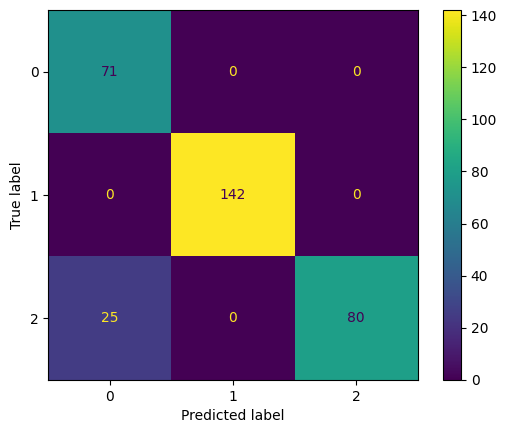

In [530]:
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(classification_report(y_test,dt_predicted))
print(ConfusionMatrixDisplay.from_predictions(y_test,dt_predicted))

In [531]:
m5='XGBClassifier'
xg=XGBClassifier()
xg.fit(X_train,y_train)
xg_pred=xg.predict(X_test)
xg_pred

array([2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1,

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       105

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



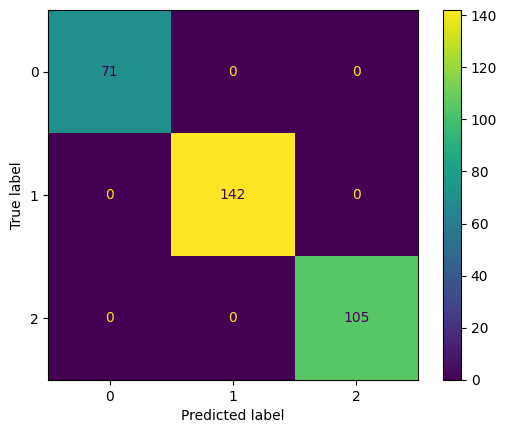

In [532]:
xgb_acc_score = accuracy_score(y_test, xg_pred)
print(classification_report(y_test,xg_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,xg_pred))

# Model Evaluation

In [533]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Extreme Gradient Boost'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,xgb_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,74.213836
1,Random Forest,100.000000
2,K-Nearest Neighbour,96.540881
3,Decision Tree,92.138365
4,Extreme Gradient Boost,100.000000


It can seen that,all the model accuracy is more than 70%.

The highest accuracy is 100% of the Extreme Gradient Boost.

Getting Feature Importance using Random Forest Model

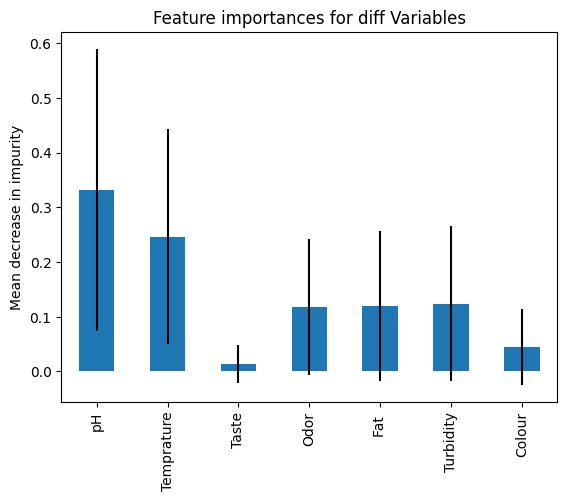

In [534]:
feature_names = list(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'])
forest = RandomForestClassifier(random_state=0, max_depth=3, bootstrap=False, criterion='gini')

#Fitting the Tree
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances for diff Variables")
ax.set_ylabel("Mean decrease in impurity")

plt.show()

Given the dataset pH and Temperature seem to be the most valuable features influencing the Grade of the Milk.

Predicting Grade based on Input

In [535]:
output = forest.predict([[6.6,36,0,1,0,1,253]])
if output == 2:
    print("Grade : Good")
if output == 1:
    print("Grade : Moderate")
if output == 0:
    print("Grade : Bad")

Grade : Good


Understand the Parameter Impact on the Quality of Milk using PCA

In [536]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(x)

PCA(n_components=0.95)

In [537]:
pca.explained_variance_ratio_

array([0.82711028, 0.15081637])

In [538]:
print(pd.DataFrame(pca.components_,columns=x.columns,index = ['PC-1','PC-2']))

            pH  Temprature     Taste      Odor     Fat   Turbidity    Colour
PC-1  0.034563    0.999331 -0.005422 -0.002404  0.00109   0.009167 -0.004789
PC-2  0.058047   -0.006565  0.009625  0.004325 -0.01278  -0.016217 -0.998023


Observed that temperature and color have over 95% composition to PC-1 and PC-2. For milk factory to ensure the quality of their product, these two parameters are the first priority.

In [539]:
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.attention.multi_head_attention import activation
from keras.layers import Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

# ANN Model Layers
from tensorflow.keras.layers import BatchNormalization
ann_model =Sequential()

ann_model.add(Dense(units = 32,activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 64,activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 1,activation = 'sigmoid'))
 
# Model Optimizer
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [540]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [541]:
# Training the ANN
history = ann_model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
47/47 [==============================] - 3s 15ms/step - loss: 0.8353 - accuracy: 0.2848 - val_loss: 1.7722 - val_accuracy: 0.2233
Epoch 2/100
47/47 [==============================] - 0s 8ms/step - loss: 0.4574 - accuracy: 0.3144 - val_loss: 0.7505 - val_accuracy: 0.4245
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.3171 - val_loss: 0.9577 - val_accuracy: 0.2987
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: -0.0194 - accuracy: 0.3495 - val_loss: 1.2085 - val_accuracy: 0.2421
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: -0.3311 - accuracy: 0.3414 - val_loss: 1.4078 - val_accuracy: 0.2421
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: -0.7971 - accuracy: 0.3603 - val_loss: 0.3729 - val_accuracy: 0.3113
Epoch 7/100
47/47 [==============================] - 0s 5ms/step - loss: -1.3302 - accuracy: 0.3752 - val_loss: -2.6299 - val_accuracy: 0.4465
Epoch 8

In [542]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                256       
                                                                 
 batch_normalization_8 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 64)               

<Axes: >

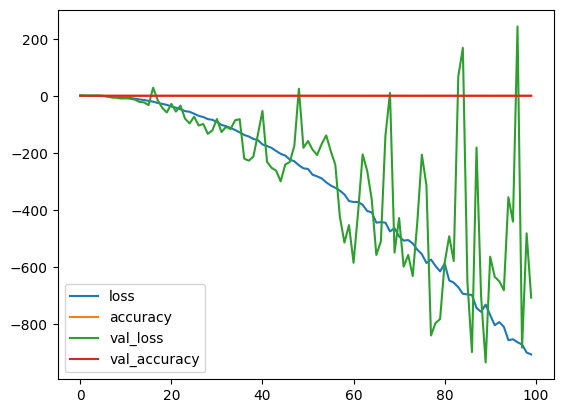

In [543]:
loss_plot = pd.DataFrame(ann_model.history.history)
loss_plot.plot()

In [544]:
#now testing for Test data
y_pred = ann_model.predict(X_test)
y_pred = (y_pred>0.5)
acc_test_ann1 = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
acc_test_ann1

10/10 [==============================] - 0s 3ms/step


44.65

In [545]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc_test_ann1 = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',acc_test_ann1)

[[  0  71   0]
 [  0 142   0]
 [  0 105   0]]
score is: 0.44654088050314467


In [546]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.45      1.00      0.62       142
           2       0.00      0.00      0.00       105

    accuracy                           0.45       318
   macro avg       0.15      0.33      0.21       318
weighted avg       0.20      0.45      0.28       318

